In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install dask

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install fastparquet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 5.1 MB/s 
     |████████████████████████████████| 1.6 MB 43.0 MB/s 


In [ ]:
import io
import json
import dask
import dask.dataframe as dd
from dask.distributed import progress
from dask.diagnostics import ProgressBar
import os
import numpy as np
import pandas as pd

Load paper embeddings

In [ ]:
#shared link to directory with embeddings  
#https://drive.google.com/drive/folders/14Zjzs2cx-z9o9BlSoieUmbMJEzGBoGMd?usp=sharing

path = '/content/drive/MyDrive/MADE/data/embed/'
columns = ['_id']
for i in range(300):
  columns.append(i)
df = dd.read_parquet('/content/drive/MyDrive/MADE/data/embed',engine='pyarrow')  # 256 MB 

In [ ]:
df

,_id,embedding
npartitions=95,,
,object,object
,...,...
...,...,...
,...,...
,...,...


In [ ]:
df.columns

Index(['_id', 'embedding'], dtype='object')

Install dask-ml to train KMeans

In [ ]:
!pip install dask-ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 148 kB 5.1 MB/s 


Transform embeddings from list to 300d vectors

In [ ]:
import time
pand_df = pd.DataFrame(columns = [str(i) for i in range(300)])
start = time.time()
for i, el in enumerate(df.partitions):
    a = pd.DataFrame(el.compute()['embedding'].to_list(), columns=[str(i) for i in range(300)])
    pand_df = pand_df.append(a, ignore_index=True)#loc[-1] = item  # adding a row
   
    if i > 0 and i % 5 == 0:
      print(i, time.time() - start)



5 10.12522554397583
10 19.21131706237793
15 28.442830324172974
20 38.277753591537476
25 47.81296157836914
30 57.16328048706055
35 66.84322929382324
40 75.99336910247803
45 84.797372341156
50 93.86396360397339
55 101.596426486969
60 109.65278267860413
65 117.49231743812561
70 124.46403908729553
75 130.40879464149475
80 136.28705048561096
85 140.022381067276
90 142.19440722465515


In [ ]:
pand_df.set_index(df['_id'].compute())

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
_id,,,,,,,,,,,,,,,,,,,,,
53e99838b7602d9702061730,0.127694,-0.095981,0.097173,-0.213574,0.040428,0.201207,-0.194796,-0.047965,0.016585,-0.025908,...,-0.055051,-0.115736,-0.018648,0.076822,-0.031790,0.077657,-0.129554,0.003648,-0.068287,-0.066314
53e99859b7602d9702095c85,0.121340,-0.058553,0.138133,-0.229551,-0.010913,0.121316,-0.140510,-0.032995,0.040727,0.021705,...,-0.022282,-0.120238,-0.085214,0.045804,0.007439,0.015015,-0.191873,-0.039066,-0.095688,-0.151637
53e997f8b7602d9702001319,0.105163,-0.043473,0.148448,-0.272367,0.029231,0.148846,-0.130700,-0.033828,0.075568,0.101023,...,-0.012520,-0.076026,-0.107029,0.027732,0.055595,0.041248,-0.156385,-0.000103,-0.133777,-0.162567
53e9987db7602d97020b4e46,0.115177,-0.081723,0.175635,-0.246403,0.007365,0.166254,-0.120839,0.001899,0.022379,0.022395,...,0.023048,-0.075502,-0.090520,0.049800,0.020538,-0.001469,-0.193494,-0.007210,-0.099426,-0.171653
53e99875b7602d97020aca38,0.192630,-0.091995,0.195174,-0.237603,0.014541,0.172141,-0.139173,-0.031952,0.017711,0.001964,...,-0.008113,-0.153763,-0.084585,0.049276,0.014209,0.059728,-0.215116,0.013944,-0.081414,-0.133619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5fc5da2f9e795eeae83ae35d,0.134999,-0.073098,0.185590,-0.241807,0.017732,0.151760,-0.093670,-0.042568,0.039133,0.024792,...,-0.013026,-0.123903,-0.137905,0.019104,0.044095,0.029519,-0.241116,-0.015820,-0.099309,-0.156724
5fe035f29e795ea5d94fd49b,0.122674,-0.065414,0.143219,-0.234272,0.057738,0.127853,-0.125520,-0.026347,0.087883,0.020923,...,0.020012,-0.111447,-0.049796,0.055077,-0.025132,0.032911,-0.148064,-0.078905,-0.067745,-0.109359
6051c7e89e795eb49a3cb2fc,0.144506,-0.085198,0.129844,-0.230726,0.012330,0.178476,-0.126667,-0.065545,0.038195,0.030339,...,0.007970,-0.092573,-0.091680,0.073110,-0.006148,0.018561,-0.199351,-0.010894,-0.068245,-0.112939


Define model

In [ ]:
from dask_ml.cluster import KMeans, SpectralClustering

def func(n):
  return KMeans(n_clusters = n, oversampling_factor = 2, random_state=1)#SpectralClustering(n_clusters = n)



In [ ]:
inert = []
#if model is traind not first time 
#pand_df = pand_df.drop(['n_cluster'], axis = 1)
with ProgressBar():
 
  for n_clusters in range(20, 21, 1):
    km = func(n_clusters)
    km.fit(pand_df)
    inert.append((n_clusters, km.inertia_))
    print(n_clusters, km.inertia_)
  
  predictions = km.predict(pand_df)
  predictions

[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.6s
[########################################] | 100% Completed |  0.7s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.9s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  1.0s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  1.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  1.5s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  1.5s
[########################################] | 100

Calculate statistics (number of items in classes)

count       20.000000
mean     31195.300000
std      13009.390698
min        967.000000
25%      27261.750000
50%      33013.500000
75%      37367.250000
max      54993.000000
Name: 0, dtype: float64


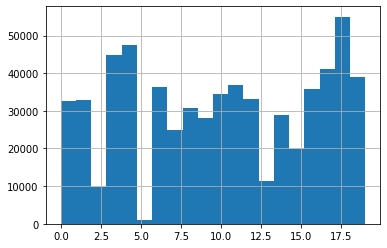

In [ ]:
n_cluster = 20 # clusters
pand_df['n_cluster'] = predictions
stat = pand_df.groupby(['n_cluster']).count()
print(stat.iloc[:, 0].describe())
pand_df['n_cluster'].hist(bins = n_cluster)


In [ ]:
print(stat.iloc[:, 0])

n_cluster
0     32549
1     32887
2      9883
3     44944
4     47440
5       967
6     36310
7     24903
8     30794
9     28048
10    34346
11    36872
12    33140
13    11361
14    28917
15    19925
16    35714
17    41060
18    54993
19    38853
Name: 0, dtype: int64


#Save model

In [ ]:
#trained model sharing link
#https://drive.google.com/file/d/1--mhDHA-g1WP2tFn7BK3bNk9XOqBBkcm/view?usp=sharing
import dill
with open('/content/drive/MyDrive/MADE/data/clusters/knn_20_model.pkl', 'wb') as file:
    dill.dump(km, file)